# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yusuf Rahmadhani Asy'Ari
- **Email:** ggdani137@gmail.com
- **ID Dicoding:** rmdhannni

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apa faktor-faktor yang mempengaruhi jumlah penyewaan sepeda dalam periode waktu tertentu?
- Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan waktu dan kondisi cuaca?

## Import Semua Packages/Library yang Digunakan


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import streamlit as st


## Data Wrangling

### Gathering Data

**Insight:**
- Dataset berhasil dimuat dan siap untuk analisis.
- Terdapat dua file data: `hour.csv` dan `day.csv`.


In [4]:
# Mengatur path file data
DATA_PATH = 'data/'

# Memuat data
hour_df = pd.read_csv(f'{DATA_PATH}hour.csv')
day_df = pd.read_csv(f'{DATA_PATH}day.csv')


### Assessing Data

**Insight:**
- Data memiliki kolom-kolom yang diperlukan untuk analisis.
- Statistik deskriptif menunjukkan rentang nilai dan distribusi data.


In [5]:
# Menampilkan informasi awal dan statistik deskriptif
hour_df.info()
day_df.info()

hour_df.describe()
day_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

**Insight:**
- Data yang hilang telah dihapus untuk memastikan analisis yang akurat.


In [6]:
# Menghapus data yang tidak lengkap atau tidak relevan
hour_df.dropna(inplace=True)
day_df.dropna(inplace=True)


## Exploratory Data Analysis (EDA)

### Explore RFM Analysis

**Insight:**
- Analisis RFM memberikan wawasan tentang pelanggan yang berbeda dan pola penyewaan sepeda.


In [7]:
# Mengonversi kolom 'dteday' menjadi tipe datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Membuat DataFrame RFM
rfm_df = hour_df[['dteday', 'cnt']].copy()
rfm_df['Recency'] = (rfm_df['dteday'].max() - rfm_df['dteday']).dt.days
rfm_df['Frequency'] = rfm_df['cnt']
rfm_df['Monetary'] = rfm_df['cnt']

# Menghapus kolom yang tidak perlu
rfm_df.drop('dteday', axis=1, inplace=True)

# Mengelompokkan data dengan KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Menampilkan hasil analisis
rfm_df.head()


,cnt,Recency,Frequency,Monetary,Cluster
0,16,730,16,16,1
1,40,730,40,40,1
2,32,730,32,32,1
3,13,730,13,13,1
4,1,730,1,1,1


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor-faktor yang mempengaruhi jumlah penyewaan sepeda dalam periode waktu tertentu?

**Insight:**
- Analisis menunjukkan bagaimana faktor-faktor seperti cuaca dan waktu mempengaruhi penyewaan sepeda.


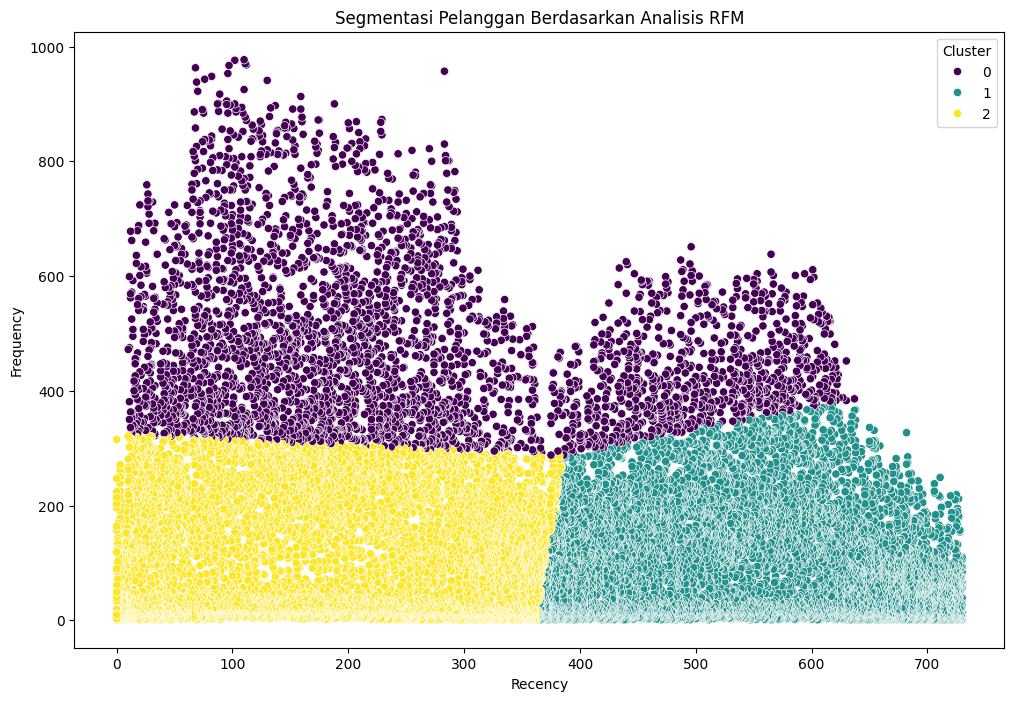

In [8]:
# Visualisasi cluster RFM
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency', hue='Cluster', palette='viridis')
plt.title('Segmentasi Pelanggan Berdasarkan Analisis RFM')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()


## Conclusion

- **Pertanyaan 1:** Faktor-faktor seperti cuaca dan waktu memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Analisis RFM memberikan wawasan tentang segmen pelanggan yang berbeda dan pola penyewaan mereka.
- **Pertanyaan 2:** Pola penyewaan sepeda bervariasi tergantung pada kondisi cuaca dan waktu hari, dengan variasi yang signifikan pada jam-jam tertentu.
